In [1]:
using PyPlot
using VAE: trainVAE, DataLoader, next_batch, reconstruct, transform, generate
using TensorFlow

In [ ]:
## Fit model
network_architecture = Dict("n_hidden_recog_1" => 500, # 1st layer encoder neurons
         "n_hidden_recog_2"=>500, # 2nd layer encoder neurons
         "n_hidden_gener_1"=>500, # 1st layer decoder neurons
         "n_hidden_gener_2"=>500, # 2nd layer decoder neurons
         "n_input"=>784, # MNIST data input (img shape: 28*28)
         "n_z"=>20)  # dimensionality of latent space

vae = trainVAE(network_architecture, training_epochs=75)

In [3]:
## compute Loss after fitting
x_sample = next_batch(vae.loader, 100)[1]
x_sample = broadcast(/,x_sample,maximum(x_sample,2))
cur_loss, = run(vae.sess, vae.Loss, Dict(vae.x => x_sample))

108.73588652865588

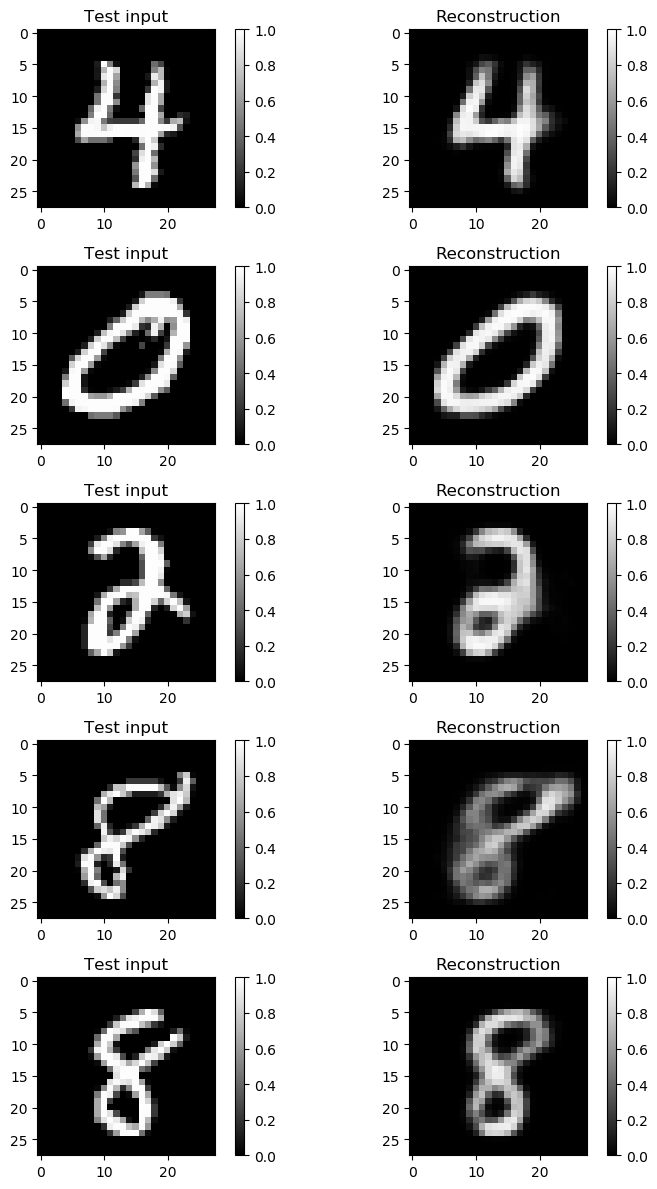

In [4]:
## plot some reconstructed samples
x_sample = next_batch(vae.loader, 100)[1]
x_sample = broadcast(/,x_sample,maximum(x_sample,2));
x_reconstruct = reconstruct(vae.sess, vae.x, vae.x_hat_μ, x_sample)

figure(figsize=(8, 12))

for i in 1:5

    subplot(5, 2, 2*i-1)
    imshow(reshape(x_sample[i,:], 28, 28), vmin=0, vmax=1, cmap="gray")
    title("Test input")
    colorbar()
    
    subplot(5, 2, 2*i)
    imshow(reshape(x_reconstruct[i,:], 28, 28), vmin=0, vmax=1, cmap="gray")
    title("Reconstruction")
    colorbar()
end

tight_layout()

In [5]:
## Look at latent space
network_architecture = Dict("n_hidden_recog_1" => 500, # 1st layer encoder neurons
         "n_hidden_recog_2"=>500, # 2nd layer encoder neurons
         "n_hidden_gener_1"=>500, # 1st layer decoder neurons
         "n_hidden_gener_2"=>500, # 2nd layer decoder neurons
         "n_input"=>784, # MNIST data input (img shape: 28*28)
         "n_z"=>2)  # dimensionality of latent space

vae2D = trainVAE(network_architecture, training_epochs=75)

Epoch 1, current loss is 187.566732214.
Epoch 2, current loss is 165.198324553.
Epoch 3, current loss is 160.008034033.
Epoch 4, current loss is 156.785357369.
Epoch 5, current loss is 154.482642605.
Epoch 6, current loss is 152.772435381.
Epoch 7, current loss is 151.347957573.
Epoch 8, current loss is 150.067956105.
Epoch 9, current loss is 148.982284615.
Epoch 10, current loss is 148.066732884.
Epoch 11, current loss is 147.314366197.
Epoch 12, current loss is 146.650363975.
Epoch 13, current loss is 146.052956946.
Epoch 14, current loss is 145.558446517.
Epoch 15, current loss is 145.146987920.
Epoch 16, current loss is 144.676986477.
Epoch 17, current loss is 144.317819092.
Epoch 18, current loss is 143.998836334.
Epoch 19, current loss is 143.704947894.
Epoch 20, current loss is 143.424115216.
Epoch 21, current loss is 143.113219572.
Epoch 22, current loss is 142.863173763.
Epoch 23, current loss is 142.553664556.
Epoch 24, current loss is 142.356397153.
Epoch 25, current loss is

VAE.VariationalAutoEncoder(Session(Ptr{Void} @0x00007f225e1e8970), <Tensor placeholder:1 shape=(?, 784) dtype=Float32>, <Tensor Add_5:1 shape=(?, 2) dtype=Float32>, <Tensor Sigmoid:1 shape=(?, 784) dtype=Float32>, <Tensor Add_3:1 shape=(?, 2) dtype=Float32>, <Tensor Add_4:1 shape=(?, 2) dtype=Float32>, <Tensor reduce_3:1 shape=() dtype=Float64>, <Tensor Group:1 shape=unknown dtype=Any>, VAE.DataLoader(1, [58511, 17669, 23873, 58975, 48200, 37860, 17770, 29735, 174, 37171  …  31914, 19156, 47243, 11046, 28244, 35541, 19166, 1765, 24197, 44986]))

In [6]:
## compute Loss after fitting
x_sample = next_batch(vae2D.loader, 100)[1]
x_sample = broadcast(/,x_sample,maximum(x_sample,2))
cur_loss, = run(vae2D.sess, vae2D.Loss, Dict(vae2D.x => x_sample))

138.02465991259254

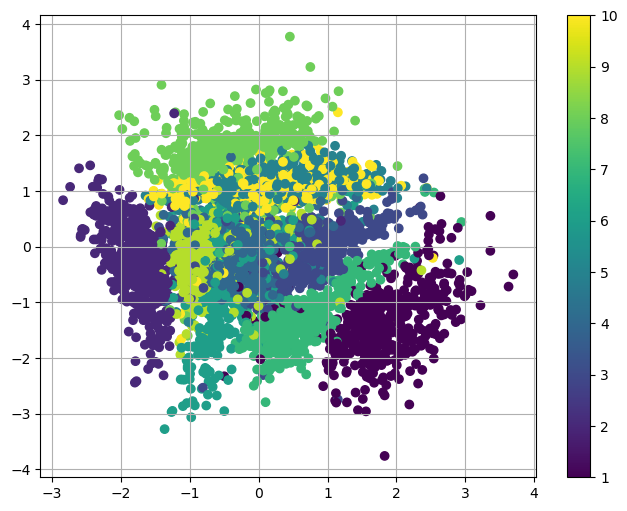

In [7]:
#plot the data in the latent space
x_sample, y_sample = next_batch(vae2D.loader, 5000)
x_sample = broadcast(/,x_sample,maximum(x_sample,2));
z_mu = transform(vae2D.sess, vae2D.x, vae2D.z_μ, x_sample)

figure(figsize=(8, 6)) 
scatter(z_mu[:, 1], z_mu[:, 2], c=vec(mapslices(indmax,y_sample,dims=2)))
colorbar()
grid()

In [ ]:
#incomplete
nx = ny = 20
x_values = linspace(-3, 3, nx)
y_values = linspace(-3, 3, ny)

canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu = np.array([[xi, yi]]*vae.batch_size)
        x_mean = generate(z_mu)
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)

figure(figsize=(8, 10))        
Xi, Yi = np.meshgrid(x_values, y_values)
imshow(canvas, origin="upper", cmap="gray")
tight_layout()